__8**.__ С помощью метода наименьших квадратов (МНК) подобрать значения параметров $a$ и $b$ для сигмоидальной функции $$y=\frac{1}{1+e^{-(ax+b)}}$$ 

по заданному распределению. Построить график.

Для удобства представим функцию в таком виде: $y = \frac{e^{ax + b}}{e^{ax + b} + 1}$

Погрешность $\varepsilon$ для каждой точки имеет вид:
$$y_{i} - \frac{e^{ax + b}}{e^{ax + b} + 1} = \varepsilon_{i}$$

Составим систему уравнений, приравняв частные производные функции ошибок $U(k,b)=\varepsilon^2_{1}+\varepsilon^2_{2}+\varepsilon^2_{3}+\varepsilon^2_{4}+...+\varepsilon^2_{n}$.
$$\begin{cases}
   U'_{k} = \sum\limits_{i=1}^n\Bigl( -2\cdot\Bigl( y_i - \frac{e^{ax_i + b}}{e^{ax_i + b} + 1} \Bigr) \cdot\frac{x_ie^{ax_i + b}}{(e^{ax_i + b} + 1)^2} \Bigr)=0, \\
   U'_{b} = \sum\limits_{i=1}^n\Bigl( -2\cdot\Bigl( y_i - \frac{e^{ax_i + b}}{e^{ax_i + b} + 1} \Bigr) \cdot\frac{e^{ax_i + b}}{(e^{ax_i + b} + 1)^2} \Bigr)=0 
 \end{cases}$$

Убираем общий коэффициент (-2) из обоих уравнений и воспользуемся методом fsolve для численного решения данной системы.

In [19]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math

n = 200
# Задаем рандомное распределение точек
xi = np.random.uniform(-8, 8, n)
yi = 1/(1+np.exp(-np.random.uniform(0.5, 1.5, n)*xi-np.random.uniform(-1, 1, n)))


def equations(p):
    a, b = p
    u_a = ((yi - np.exp(a*xi + b) / (np.exp(a*xi + b) + 1)) * ((xi*np.exp(a*xi + b)) / (np.exp(a*xi + b) + 1)**2)).sum()
    u_b = ((yi - np.exp(a*xi + b) / (np.exp(a*xi + b) + 1)) * (np.exp(a*xi + b) / (np.exp(a*xi + b) + 1)**2)).sum()
        
    return (u_a, u_b)


# Численное решение системы уравнений
a, b =  fsolve(equations, (0, 0))
print (a, b)

0.9280737008514949 0.10982645680157181


Вычислим значение коэффициента корреляции:

$$r=\sqrt{\frac{\sum\limits_{i=1}^n(y_{i}-\overline y)^2-\sum\limits_{i=1}^n(y_{i}-y(x_{i}))^2}{\sum\limits_{i=1}^n(y_{i}-\overline y)^2}}$$

In [20]:
mean_y = yi.sum() / n

r = np.sqrt((((yi - mean_y)**2).sum()-((yi - (1 / (1 + 1 / np.exp(a*xi + b))))**2).sum())/((yi - mean_y)**2).sum())
r

0.9874133472524826

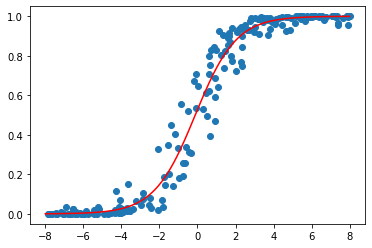

In [21]:
plt.plot(xi,yi, marker="o", ls="")

x = np.linspace(-8, 8, n)
plt.plot(x, 1 / (1 + 1 / np.exp(a*x + b)), color="r")

plt.show()